In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [3]:
df = pd.read_csv('/Occupancy_Estimation (1).csv')

In [4]:
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [5]:
df.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')

In [6]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [7]:
df.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

In [8]:
df["Date"] = pd.to_datetime(df["Date"])
df["Time"] = pd.to_timedelta(df["Time"])

In [9]:
df.dtypes

Date                     datetime64[ns]
Time                    timedelta64[ns]
S1_Temp                         float64
S2_Temp                         float64
S3_Temp                         float64
S4_Temp                         float64
S1_Light                          int64
S2_Light                          int64
S3_Light                          int64
S4_Light                          int64
S1_Sound                        float64
S2_Sound                        float64
S3_Sound                        float64
S4_Sound                        float64
S5_CO2                            int64
S5_CO2_Slope                    float64
S6_PIR                            int64
S7_PIR                            int64
Room_Occupancy_Count              int64
dtype: object

In [10]:
df.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [11]:
DateTime = df["Date"] + df["Time"]
df.insert(loc = 0, column = "Date_Time", value = DateTime)

In [12]:
weekday = df['Date_Time'].dt.weekday + 1
df.insert(loc = 0, column = "Day of week", value = weekday)

dayhour = df['Date_Time'].dt.hour + 1
df.insert(loc = 0, column = "Hour of day", value = dayhour)

In [13]:
temp_mean = df.iloc[:,5:9].mean(axis=1)
df.insert(loc = 0, column = "Mean_Temperature", value = temp_mean)

light_mean = df.iloc[:,9:13].mean(axis=1)
df.insert(loc = 0, column = "Mean_light", value = light_mean)

sound_mean = df.iloc[:,13:17].mean(axis=1)
df.insert(loc = 0, column = "Mean_sound", value = sound_mean)

In [14]:
footsteps_sound = ((df['S1_Sound']+df['S2_Sound']+df['S3_Sound']+df['S4_Sound'])/4)*((df['S6_PIR']+df['S7_PIR']+0.1)/2)
df.insert(loc = 16, column = "Footsteps_Sound", value = footsteps_sound)

pir_level = df['S6_PIR']+df['S7_PIR']
df.insert(loc = 17, column = "PIR_Level", value = pir_level)

In [15]:
rolling =df['S5_CO2'].rolling(window=10)
rolling_mean = rolling.mean()
df.insert(loc = 0, column = "MA_CO2", value = rolling_mean)

In [16]:
rolling = df['S5_CO2'].rolling(window=10)
rolling_variance = rolling.var()
df.insert(loc = 0, column = "MV_CO2", value = rolling_variance)

In [17]:
df.head(10)

,MV_CO2,MA_CO2,Mean_sound,Mean_light,Mean_Temperature,Hour of day,Day of week,Date_Time,Date,Time,...,PIR_Level,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,NaN,NaN,23.3175,58.345,24.9075,11,5,2017-12-22 10:49:41,2017-12-22,0 days 10:49:41,...,0,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,NaN,NaN,23.4950,58.110,24.9225,11,5,2017-12-22 10:50:12,2017-12-22,0 days 10:50:12,...,0,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,NaN,NaN,23.3850,58.360,24.9225,11,5,2017-12-22 10:50:42,2017-12-22,0 days 10:50:42,...,0,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,NaN,NaN,23.3775,58.360,24.9375,11,5,2017-12-22 10:51:13,2017-12-22,0 days 10:51:13,...,0,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,NaN,NaN,23.5600,58.610,24.9375,11,5,2017-12-22 10:51:44,2017-12-22,0 days 10:51:44,...,0,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
5,NaN,NaN,23.5475,58.610,24.9525,11,5,2017-12-22 10:52:14,2017-12-22,0 days 10:52:14,...,0,0.13,0.06,0.06,0.07,390,0.165385,0,0,1
6,NaN,NaN,23.9275,58.360,24.9375,11,5,2017-12-22 10:52:45,2017-12-22,0 days 10:52:45,...,1,1.39,0.32,0.43,0.06,390,0.076923,1,0,1
7,NaN,NaN,23.7875,58.610,24.9525,11,5,2017-12-22 10:53:15,2017-12-22,0 days 10:53:15,...,0,0.09,0.06,0.09,0.05,390,-0.011538,0,0,1
8,NaN,NaN,24.7850,59.625,24.9675,11,5,2017-12-22 10:53:46,2017-12-22,0 days 10:53:46,...,0,0.09,0.05,0.06,0.13,390,-0.100000,0,0,1
9,0.0,390.0,26.1200,54.375,24.9675,11,5,2017-12-22 10:54:17,2017-12-22,0 days 10:54:17,...,2,3.84,0.64,0.48,0.39,390,-0.188462,1,1,1


In [18]:
df = df.dropna()
df = df.reset_index()
df = df.drop(['index'], axis=1)
df.head()

,MV_CO2,MA_CO2,Mean_sound,Mean_light,Mean_Temperature,Hour of day,Day of week,Date_Time,Date,Time,...,PIR_Level,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,0.0,390.0,26.1200,54.375,24.9675,11,5,2017-12-22 10:54:17,2017-12-22,0 days 10:54:17,...,2,3.84,0.64,0.48,0.39,390,-0.188462,1,1,1
1,0.0,390.0,25.6275,59.860,24.9675,11,5,2017-12-22 10:54:47,2017-12-22,0 days 10:54:47,...,2,2.20,0.31,0.33,0.21,390,-0.276923,1,1,1
2,0.0,390.0,25.3875,60.125,24.9825,11,5,2017-12-22 10:55:18,2017-12-22,0 days 10:55:18,...,1,0.42,0.13,0.14,0.09,390,-0.365385,1,0,1
3,0.0,390.0,25.0900,60.125,25.0175,11,5,2017-12-22 10:55:49,2017-12-22,0 days 10:55:49,...,1,0.21,0.15,0.07,0.06,390,-0.453846,1,0,1
4,0.0,390.0,25.7175,60.140,25.0150,11,5,2017-12-22 10:56:19,2017-12-22,0 days 10:56:19,...,1,1.66,0.21,0.12,0.09,390,-0.542308,1,0,1


In [19]:
df = df.loc[df['Date']=='2017/12/22']

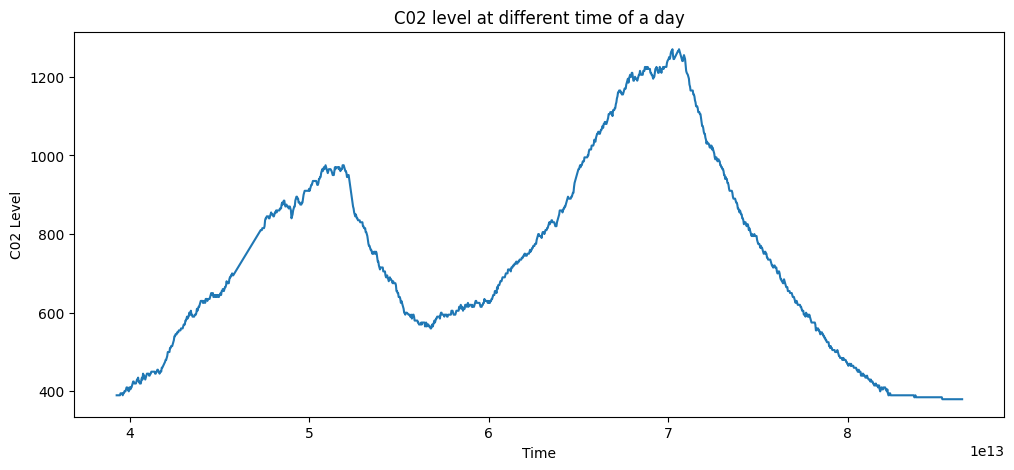

In [20]:
plt.figure( figsize = (12, 5)) 
sns.lineplot(x = 'Time', y = 'S5_CO2', data = df) 
plt.xlabel('Time')   
plt.ylabel('C02 Level')
plt.title('C02 level at different time of a day')
plt.show()

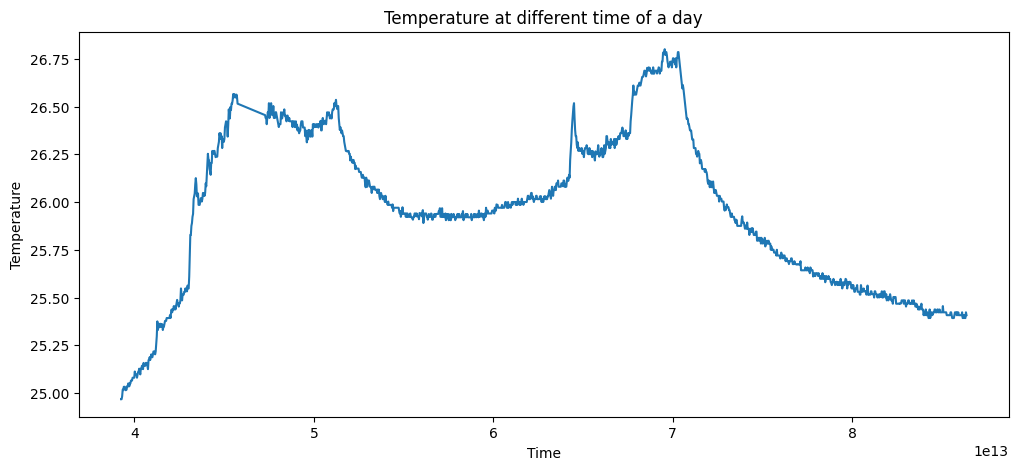

In [21]:
plt.figure( figsize = (12, 5)) 
sns.lineplot(x = 'Time', y = 'Mean_Temperature', data = df) 
plt.xlabel('Time')   
plt.ylabel('Temperature')
plt.title('Temperature at different time of a day')
plt.show()

In [22]:
df = df.drop(['Date', 'Time', 'Date_Time'], axis=1)
df.head()

,MV_CO2,MA_CO2,Mean_sound,Mean_light,Mean_Temperature,Hour of day,Day of week,S1_Temp,S2_Temp,S3_Temp,...,PIR_Level,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,0.0,390.0,26.1200,54.375,24.9675,11,5,25.00,24.81,24.56,...,2,3.84,0.64,0.48,0.39,390,-0.188462,1,1,1
1,0.0,390.0,25.6275,59.860,24.9675,11,5,25.06,24.81,24.56,...,2,2.20,0.31,0.33,0.21,390,-0.276923,1,1,1
2,0.0,390.0,25.3875,60.125,24.9825,11,5,25.06,24.81,24.56,...,1,0.42,0.13,0.14,0.09,390,-0.365385,1,0,1
3,0.0,390.0,25.0900,60.125,25.0175,11,5,25.06,24.88,24.63,...,1,0.21,0.15,0.07,0.06,390,-0.453846,1,0,1
4,0.0,390.0,25.7175,60.140,25.0150,11,5,25.06,24.81,24.63,...,1,1.66,0.21,0.12,0.09,390,-0.542308,1,0,1


In [23]:
class_count = df['Room_Occupancy_Count'].value_counts()

labels=[0,1,2,3]

classes=[0]*len(class_count)
for index in range(len(class_count)):
  classes[index]= df[df['Room_Occupancy_Count'] == labels[index]]

for index in range(len(classes)):
  print('class '+str(index)+':',classes[index].shape)

class 0: (637, 26)
class 1: (196, 26)
class 2: (257, 26)
class 3: (363, 26)


In [24]:
data=df.values

In [25]:
features, label = data[:, :-1], data[:, -1]

In [26]:
features = features.astype('float32')

In [27]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size = 0.20,random_state=132)

In [29]:
model = KNeighborsClassifier(n_neighbors = 50)
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [30]:
model = KNeighborsClassifier(n_neighbors = 50)
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Accuracy: ', accuracy_score(y_test, pred))
print('Precision: ', precision_score(y_test, pred, average='macro'))
print('Recall: ', recall_score(y_test, pred, average='macro'))
print('f1-score: ', f1_score(y_test, pred, average='macro'))

Accuracy:  0.9656357388316151
Precision:  0.9575746965452848
Recall:  0.9579290905004495
f1-score:  0.9574014889337493


In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

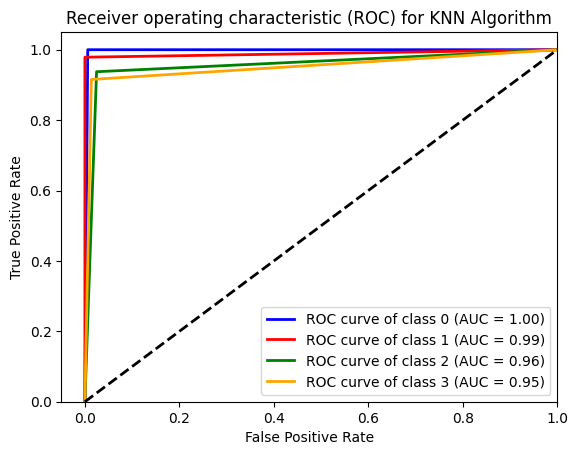

In [33]:
y_train_1 = label_binarize(y_train, classes=[0, 1, 2, 3])
y_test_1 = label_binarize(y_test, classes=[0, 1, 2, 3])
pred = label_binarize(pred, classes=[0, 1, 2, 3])
n_classes = 4

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_1[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) for KNN Algorithm')
plt.legend(loc="lower right")
plt.show()

In [34]:
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto')
model.fit(x_train, y_train)
pred = model.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
print('Accuracy: ', accuracy_score(y_test, pred))
print('Precision: ', precision_score(y_test, pred, average='macro'))
print('Recall: ', recall_score(y_test, pred, average='macro'))
print('f1-score: ', f1_score(y_test, pred, average='macro'))

Accuracy:  0.9759450171821306
Precision:  0.9718274927341829
Recall:  0.9684924707821396
f1-score:  0.9701274317390441


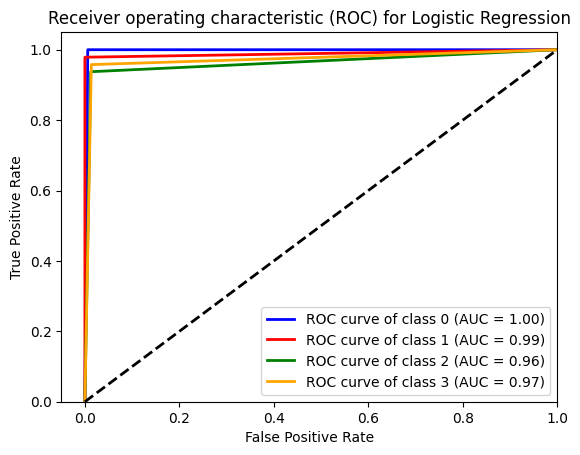

In [36]:
y_train_2 = label_binarize(y_train, classes=[0, 1, 2, 3])
y_test_2 = label_binarize(y_test, classes=[0, 1, 2, 3])
pred = label_binarize(pred, classes=[0, 1, 2, 3])
n_classes = 4

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_2[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [37]:
model = SVC(kernel='rbf')
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [38]:
print(accuracy_score(y_test, pred))
print(precision_score(y_test, pred, average='macro'))
print(recall_score(y_test, pred, average='macro'))
print(f1_score(y_test, pred, average='macro'))

0.9656357388316151
0.9575746965452848
0.9579290905004495
0.9574014889337493


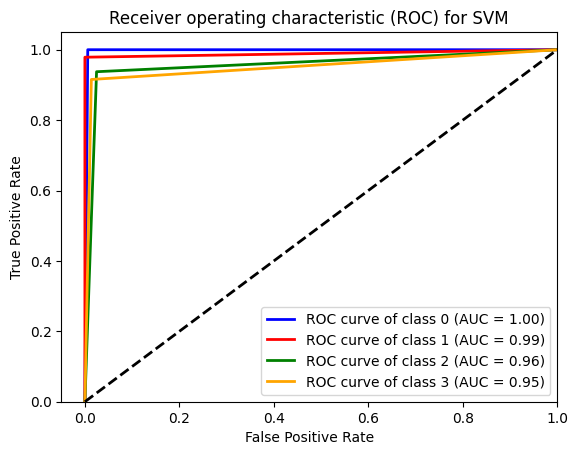

In [39]:
y_train = label_binarize(y_train, classes=[0, 1, 2, 3])
y_test = label_binarize(y_test, classes=[0, 1, 2, 3])
pred = label_binarize(pred, classes=[0, 1, 2, 3])
n_classes = 4

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) for SVM')
plt.legend(loc="lower right")
plt.show()

In [40]:
model = GaussianNB()
model = MultiOutputClassifier(model, n_jobs=-1)
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [41]:
print(accuracy_score(y_test, pred))
print(precision_score(y_test, pred, average='macro'))
print(recall_score(y_test, pred, average='macro'))
print(f1_score(y_test, pred, average='macro'))

0.8556701030927835
0.8825903825903826
0.9502581285585855
0.9053182374923447


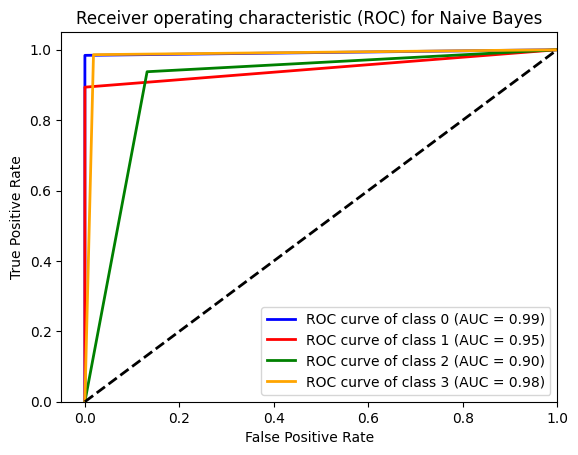

In [42]:
y_train = label_binarize(y_train, classes=[0, 1, 2, 3])
y_test = label_binarize(y_test, classes=[0, 1, 2, 3])
pred = label_binarize(pred, classes=[0, 1, 2, 3])
n_classes = 4

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) for Naive Bayes')
plt.legend(loc="lower right")
plt.show()